In [49]:
import pandas as pd
import numpy as np
#data viz 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
plt.rcParams.update({'font.size': 22})

In [2]:
#read in processed dnd_char data and features
#drop unnecessary columns/ ones that are not one-hot encoded
mc = pd.read_csv('~/Documents/GitHub/classy_dnd/dnd_chars_cleaned.csv')
mc.drop(['Unnamed: 0', 'background', 'feats', 'weapons', 'skills',
         'castingStat' ,'processedWeapons', 'processedSpells', 'processedRace', 'justClass', 
        'levelGroup','level', 'class'], axis=1, inplace=True)

In [3]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HP               9784 non-null   int64  
 1   AC               9784 non-null   int64  
 2   Str              9784 non-null   int64  
 3   Dex              9784 non-null   int64  
 4   Con              9784 non-null   int64  
 5   Int              9784 non-null   int64  
 6   Wis              9784 non-null   int64  
 7   Cha              9784 non-null   int64  
 8   Acrobatics       9784 non-null   int64  
 9   Animal Handling  9784 non-null   int64  
 10  Arcana           9784 non-null   int64  
 11  Athletics        9784 non-null   int64  
 12  Deception        9784 non-null   int64  
 13  History          9784 non-null   int64  
 14  Insight          9784 non-null   int64  
 15  Intimidation     9784 non-null   int64  
 16  Investigation    9784 non-null   int64  
 17  Medicine      

In [4]:
x_train, x_test, y_train, y_test = train_test_split(mc.iloc[:, 0:-1], mc.iloc[:, -1], 
                                                    test_size = 0.2, random_state=42, 
                                                    stratify = mc.iloc[:, -1])
#stratify splits the data so the minor class is evenly distributed among train and test sets

In [5]:
#preliminary logistic regression model
lr_mc = LogisticRegression(solver='liblinear')
lr_mc.fit(x_train, y_train)
lr_mc.score(x_test, y_test)

0.8926928972917731

Feature: 0, Score: 0.01439
Feature: 1, Score: 0.16232
Feature: 2, Score: -0.04926
Feature: 3, Score: -0.06778
Feature: 4, Score: -0.10458
Feature: 5, Score: -0.03885
Feature: 6, Score: -0.01422
Feature: 7, Score: 0.01200
Feature: 8, Score: 0.29043
Feature: 9, Score: 0.27480
Feature: 10, Score: 0.29821
Feature: 11, Score: 0.38992
Feature: 12, Score: 0.32920
Feature: 13, Score: 0.17296
Feature: 14, Score: 0.47209
Feature: 15, Score: 0.50369
Feature: 16, Score: 0.43809
Feature: 17, Score: -0.04894
Feature: 18, Score: 0.30433
Feature: 19, Score: 0.73635
Feature: 20, Score: 0.26652
Feature: 21, Score: 0.31124
Feature: 22, Score: 0.24216
Feature: 23, Score: 0.31630
Feature: 24, Score: 0.56781
Feature: 25, Score: 0.64263
Feature: 26, Score: 0.10585
Feature: 27, Score: -0.70958
Feature: 28, Score: -0.59267
Feature: 29, Score: -1.57733
Feature: 30, Score: -0.13305
Feature: 31, Score: -0.64732
Feature: 32, Score: -0.31573
Feature: 33, Score: -0.10600
Feature: 34, Score: -0.61094
Feature: 35, Sco

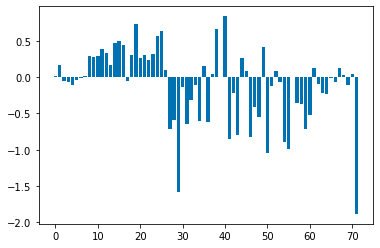

In [7]:
# get feature importance
importance = lr_mc.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [6]:
#Classifier stats
print('Logistic Regression Baseline Metrics') 
print('Precision: %.3f, Recall: %.3f, F-1 Score: %.3f, ROC AUC Score: %.3f' % \
      (precision_score(y_test, lr_mc.predict(x_test)), recall_score(y_test, lr_mc.predict(x_test)), f1_score(y_test, lr_mc.predict(x_test)), roc_auc_score(y_test,lr_mc.predict(x_test))))

Logistic Regression Baseline Metrics
Precision: 0.595, Recall: 0.209, F-1 Score: 0.309, ROC AUC Score: 0.595


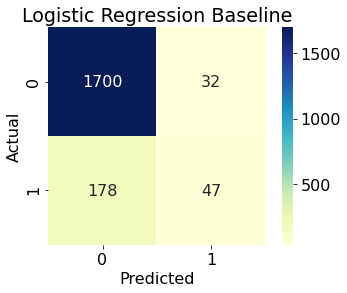

In [47]:
#confusion matrix as a heatmap in seaborn
sns.heatmap(confusion_matrix(y_test, lr_mc.predict(x_test)), 
            cmap=plt.cm.YlGnBu,
            annot=True,fmt ='d', square=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Baseline')
plt.savefig('base_logr.png');

In [9]:
#use class_weight to weight the positive class more heavily
#note the hit in accuracy because of this: 0.893 to 0.746
lr_b = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_b.fit(x_train, y_train)
lr_b.score(x_test, y_test)

0.7455288707204906

In [51]:
#significant increase in recall, F-1 score, and ROC AUC score
#baseline stats: precision 0.595, Recall 0.209, F-1 0.309, ROC AUC 0.595
#Precision decrease by ~0.3
#Recall increase by ~0.6
#F-1 increase by 0.1
#ROC AUC increase by 0.15

print('Logistic Regression Balanced Weight Metrics') 
print('Precision: %.3f, Recall: %.3f, F-1 Score: %.3f, ROC AUC Score: %.3f' % \
      (precision_score(y_test, lr_b.predict(x_test)), recall_score(y_test, lr_b.predict(x_test)), f1_score(y_test, lr_b.predict(x_test)), roc_auc_score(y_test,lr_b.predict(x_test))))

Logistic Regression Balanced Weight Metrics
Precision: 0.284, Recall: 0.796, F-1 Score: 0.418, ROC AUC Score: 0.767


Feature: 0, Score: 0.01695
Feature: 1, Score: 0.14415
Feature: 2, Score: -0.03254
Feature: 3, Score: -0.04775
Feature: 4, Score: -0.09498
Feature: 5, Score: -0.03483
Feature: 6, Score: 0.00249
Feature: 7, Score: 0.00109
Feature: 8, Score: 0.38672
Feature: 9, Score: 0.29427
Feature: 10, Score: 0.37215
Feature: 11, Score: 0.35310
Feature: 12, Score: 0.43184
Feature: 13, Score: 0.17431
Feature: 14, Score: 0.46506
Feature: 15, Score: 0.61805
Feature: 16, Score: 0.47299
Feature: 17, Score: -0.00540
Feature: 18, Score: 0.38867
Feature: 19, Score: 0.63432
Feature: 20, Score: 0.30169
Feature: 21, Score: 0.36496
Feature: 22, Score: 0.37377
Feature: 23, Score: 0.28399
Feature: 24, Score: 0.60271
Feature: 25, Score: 0.74898
Feature: 26, Score: 0.05889
Feature: 27, Score: -0.88238
Feature: 28, Score: -0.70488
Feature: 29, Score: -1.68403
Feature: 30, Score: -0.09067
Feature: 31, Score: -0.80456
Feature: 32, Score: -0.60114
Feature: 33, Score: -0.37063
Feature: 34, Score: -0.86457
Feature: 35, Scor

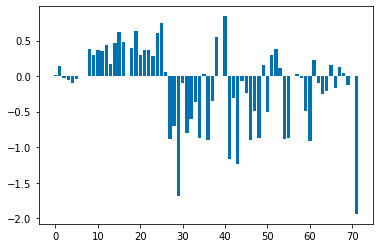

In [11]:
# get importance
importance = lr_b.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

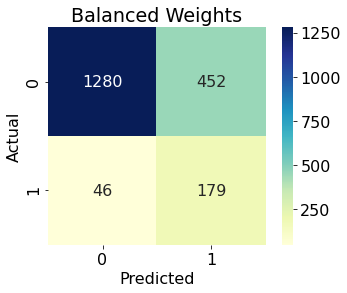

In [46]:
sns.heatmap(confusion_matrix(y_test, lr_b.predict(x_test)), 
            cmap=plt.cm.YlGnBu,
            annot=True, fmt ='d',square=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Balanced Weights')

plt.savefig('balanced_logr.png');

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.9264179867143587

In [52]:
print('Random Forest Metrics') 
print('Precision: %.3f, Recall: %.3f, F-1 Score: %.3f, ROC AUC Score: %.3f' % \
      (precision_score(y_test, rf.predict(x_test)), recall_score(y_test, rf.predict(x_test)), f1_score(y_test, rf.predict(x_test)), roc_auc_score(y_test,rf.predict(x_test))))

Random Forest Metrics
Precision: 0.918, Recall: 0.396, F-1 Score: 0.553, ROC AUC Score: 0.695


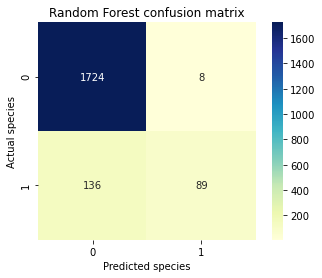

In [16]:
sns.heatmap(confusion_matrix(y_test, rf.predict(x_test)), 
            cmap=plt.cm.YlGnBu,
            annot=True, fmt ='d',square=True)

plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Random Forest confusion matrix');

Feature: 0, Score: 0.09127
Feature: 1, Score: 0.05515
Feature: 2, Score: 0.04359
Feature: 3, Score: 0.04199
Feature: 4, Score: 0.03886
Feature: 5, Score: 0.04488
Feature: 6, Score: 0.04370
Feature: 7, Score: 0.04387
Feature: 8, Score: 0.01344
Feature: 9, Score: 0.00720
Feature: 10, Score: 0.00802
Feature: 11, Score: 0.01081
Feature: 12, Score: 0.01018
Feature: 13, Score: 0.00923
Feature: 14, Score: 0.01297
Feature: 15, Score: 0.01139
Feature: 16, Score: 0.01139
Feature: 17, Score: 0.00652
Feature: 18, Score: 0.00785
Feature: 19, Score: 0.01676
Feature: 20, Score: 0.00933
Feature: 21, Score: 0.01281
Feature: 22, Score: 0.00852
Feature: 23, Score: 0.00966
Feature: 24, Score: 0.01375
Feature: 25, Score: 0.01349
Feature: 26, Score: 0.01033
Feature: 27, Score: 0.00554
Feature: 28, Score: 0.00603
Feature: 29, Score: 0.00386
Feature: 30, Score: 0.00527
Feature: 31, Score: 0.00246
Feature: 32, Score: 0.00349
Feature: 33, Score: 0.00424
Feature: 34, Score: 0.00175
Feature: 35, Score: 0.00401
Fe

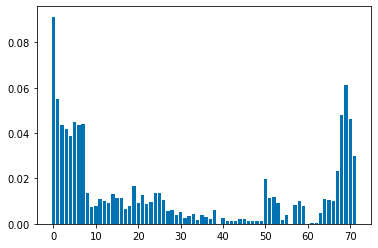

In [17]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [18]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [19]:
#use NB guassian for some of the continuous features
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test,y_test)

0.795094532447624

In [53]:
print('Guassian NB Baseline Metrics') 
print('Precision: %.3f, Recall: %.3f, F-1 Score: %.3f, ROC AUC Score: %.3f' % \
      (precision_score(y_test, gnb.predict(x_test)), recall_score(y_test, gnb.predict(x_test)), f1_score(y_test, gnb.predict(x_test)), roc_auc_score(y_test,gnb.predict(x_test))))

Guassian NB Baseline Metrics
Precision: 0.304, Recall: 0.609, F-1 Score: 0.406, ROC AUC Score: 0.714


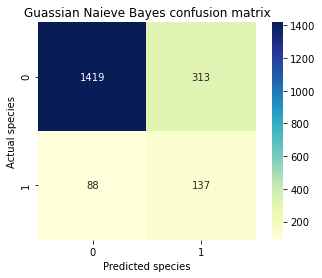

In [21]:
sns.heatmap(confusion_matrix(y_test, gnb.predict(x_test)), 
            cmap=plt.cm.YlGnBu,
            annot=True, fmt ='d',square=True)

plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Guassian Naieve Bayes confusion matrix');

In [22]:
#try Bernoulli NB since most of the features are actually categorical
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
bnb.score(x_test,y_test)

0.8538579458354625

In [54]:
print('Bernoulli Naieve Bayes Metrics') 
print('Precision: %.3f, Recall: %.3f, F-1 Score: %.3f, ROC AUC Score: %.3f' % \
      (precision_score(y_test, bnb.predict(x_test)), recall_score(y_test, bnb.predict(x_test)), f1_score(y_test, bnb.predict(x_test)), roc_auc_score(y_test,bnb.predict(x_test))))

Bernoulli Naieve Bayes Metrics
Precision: 0.390, Recall: 0.480, F-1 Score: 0.430, ROC AUC Score: 0.691


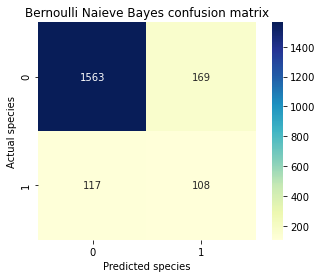

In [24]:
sns.heatmap(confusion_matrix(y_test, bnb.predict(x_test)), 
            cmap=plt.cm.YlGnBu,
            annot=True, fmt ='d',square=True)

plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Bernoulli Naieve Bayes confusion matrix');

In [25]:
mc_fpr, mc_tpr, mc_thresholds = roc_curve(y_test, lr_mc.predict_proba(x_test)[:,1])
b_fpr, b_tpr, b_thresholds = roc_curve(y_test, lr_b.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb.predict_proba(x_test)[:,1])
bnb_fpr, bnb_tpr, bnb_thresholds = roc_curve(y_test, bnb.predict_proba(x_test)[:,1])



MC ROC AUC score =  0.834100590197588
Balanced ROC AUC score =  0.8367872722607134
RF ROC AUC score =  0.931258660508083
Guassian NB ROC AUC score =  0.7675160379779317
Bernoulli NB ROC AUC score =  0.8026661534513728


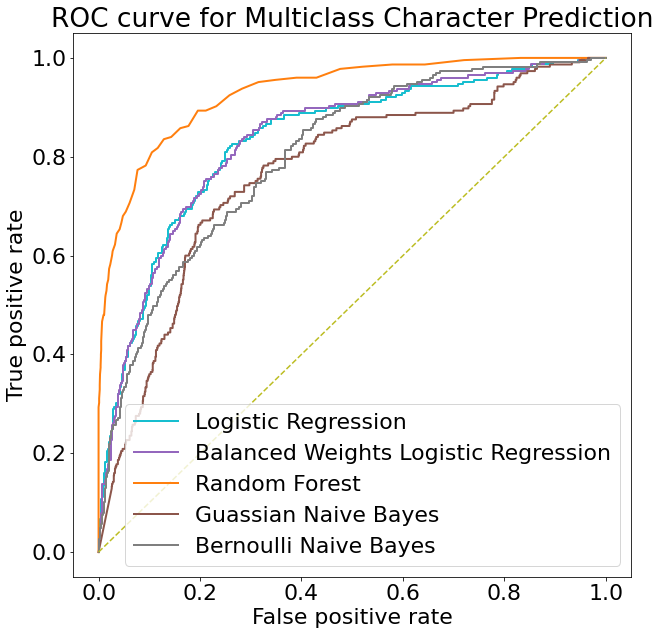

In [55]:
plt.figure(figsize=(10,10))
plt.plot(mc_fpr, mc_tpr,lw=2, label = 'Logistic Regression', c = 'tab:cyan')
plt.plot(b_fpr, b_tpr,lw=2, label = 'Balanced Weights Logistic Regression',  c='tab:purple')
plt.plot(rf_fpr, rf_tpr,lw=2, label = 'Random Forest',  c='tab:orange')
plt.plot(gnb_fpr, gnb_tpr,lw=2, label = 'Guassian Naive Bayes',  c='tab:brown')
plt.plot(bnb_fpr, bnb_tpr,lw=2, label = 'Bernoulli Naive Bayes',  c='tab:gray')


plt.plot([0,1],[0,1],c='tab:olive',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Multiclass Character Prediction')
plt.legend();
print("MC ROC AUC score = ", roc_auc_score(y_test, lr_mc.predict_proba(x_test)[:,1]))
print("Balanced ROC AUC score = ", roc_auc_score(y_test, lr_b.predict_proba(x_test)[:,1]))
print("RF ROC AUC score = ", roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))
print("Guassian NB ROC AUC score = ", roc_auc_score(y_test, gnb.predict_proba(x_test)[:,1]))
print("Bernoulli NB ROC AUC score = ", roc_auc_score(y_test, bnb.predict_proba(x_test)[:,1]))
plt.savefig('all_models_mc.png')

In [27]:
#other models to try SVM and Xgboost
#drop unimportant features, race may not be helpful here, 
# how to weight minority class for NB and RF
#more feature engineering? weapons per level?, certain class combos? spells per lvl and weapons?
